In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from math import sqrt

x = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24]

y = [59, 56, 53, 54, 60, 67, 72, 74, 75, 74, 70, 65, 61]

In [52]:
#Newton’s Divided difference, produces coefficients of interpolating polynomial
def coef(x,y):
    n = len(x)
    a = np.zeros((n,n+1))
    a[:,0]= x
    a[:,1]= y
#Find the divided differences
    for j in range(2,n+1):
        for i in range(j-1,n):
            a[i,j] = (a[i,j-1]-a[i-1,j-1]) / (a[i,0]-a[i-j+1,0])
#Copy diagonal elements into array for returning
    p = np.zeros(n)
    for k in range(0,n):
        p[k] = a[k,k+1]
    return p

#Evaluate polynomial at a given point
def newton_method(t,x,p):
    n = len(x)
    result = p[n-1]
    for i in range(n-2,-1,-1):
        result = result*(t-x[i]) + p[i]
    return result

In [53]:
def nat_cubic_spline(x0, x, y):
    x = np.array(x)
    y = np.array(y)

    n = len(x)

    #Find change between each x and y
    xdiff = np.diff(x)
    ydiff = np.diff(y)

    #Initialize matrices
    Li = np.empty(n)
    Li_1 = np.empty(n-1)
    z = np.empty(n)

    #Step 3
    Li[0] = sqrt(2*xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0 # natural boundary
    z[0] = B0 / Li[0]

    #Step 4a
    for i in range(1, n-1, 1):
        Li_1[i] = xdiff[i-1] / Li[i-1]
        Li[i] = sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    #Step 4b
    i = n - 1
    Li_1[i-1] = xdiff[-1] / Li[i-1]
    Li[i] = sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0 # natural boundary
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    #Step 6
    i = n-1
    z[i] = z[i] / Li[i]
    for i in range(n-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

    # find index
    index = x.searchsorted(x0)
    np.clip(index, 1, n-1, index)

    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0

    # calculate cubic
    f0 = zi0/(6*hi1)*(xi1-x0)**3 + \
         zi1/(6*hi1)*(x0-xi0)**3 + \
         (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + \
         (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0

## Question 01

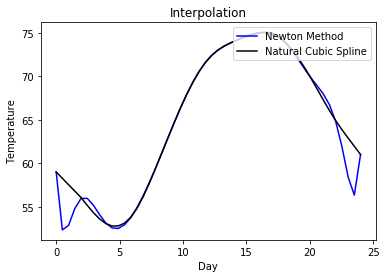

In [54]:
a = coef(x,y)
graphRange = np.linspace(min(x),max(x))
yval = newton_method(graphRange,x,a)
plt.plot(graphRange,yval,color='b',linestyle='-',label='Newton Method')
plt.plot(graphRange, nat_cubic_spline(graphRange, x, y),color='k',linestyle='-',label='Natural Cubic Spline')
plt.title('Interpolation')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.legend(loc='upper right')
plt.show()

## Question 02

In [55]:
newton_method(11,x,a)

69.91312909126282

In [56]:
nat_cubic_spline([11], x, y)

array([69.88059715])

## Question 03

In [57]:
newton_method(25,x,a)

152.04890751838786

In [58]:
nat_cubic_spline([25], x, y)

array([58.81042242])

## Question 04

In [59]:
newton_method(34,x,a)

869864.0000000001

In [60]:
nat_cubic_spline([34], x, y)

array([-34.83102062])

## Troubleshooting // Debugging

In [202]:
#Note: S(x) = S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3 for x_j <= x <= x_j+1
#INPUT n; x_0, x_1, ..., x_n; a_0 = f(x_0), a_1 = f(x_n)
def nat_cubic_spline(x, y):
    n= len(x)
    h = [None] * n
    a = y
    l = [None] * n
    u = [None] * n
    z = [None] * n
    c = [None] * n
    b = [None] * n
    d = [None] * n
#STEP1 For i = 0, 1, ..., n - 1 set h_i = x_i+1 - x_i
    for i in range(0, n - 1):
        h[i] = x[i + 1] - x[i]
#STEP2 For i = 1 2, ..., n - 1 set
    #a_i = (3/h_i)(a_i+1 - a_i) - (3/h_i-1)(a_i - a_i-1)
    for i in range (1, n - 1):
        a[i] = (3/h[i]) * (a[i]+1 - a[i]) - (3/h[i-1]) * (a[i] - a[i-1])
#STEP3 Set l_0 = 1;
    # u_0 = 0;
    # z_0 = 0;
    l[0] = 1
    u[0] = 0
    z[0] = 0
#STEP4 For i = 1, 2, ..., n - 1
    #Set l_i = 2(x_i+1 - x_i-1) - h_i-1 * u_i-1
    #u_i = h_i / l_i;
    #z_i = (a_i - h_i-1 * z_i-1)/l_i
    i = 1
    while i < (n - 1):
        l[i] = 2 * (x[i+1] - x[i-1]) - (h[i-1] * u[i-1])
        u[i] = h[i] / l[i]
        z[i] = (a[i] - h[i-1] * z[i-1])/l[i]
        i = i + 1
#STEP5 Set l_n = 1;
    #z_n = 0;
    #c_n = 0
    l.append(1)
    z.append(0)
    c.append(0)
#STEP6 For j = n-1, n-2, ..., 0
    # set c_j = z_j - u_j * c_j+1;
    # b_j = (a_j+1 - a_j)/h_j - h_j(c_j+1 + 2c_j)/3;
    # d_j = (c_j+1 - c_j)/(3h_j).
    j = n - 1
    while j > 0:
        c[j] = z[j] - u[j] * c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
        d[j] = (c[j+1] - c[j])/(3*h[j])
        j = j - 1
#STEP7 OUTPUT (a_j, b_j, c_j, d_j for j = 0, 1, ..., n-1) STOP
    for j in range(0, n-1):
        return a[j]
        return b[j]
        return c[j]
        return d[j]

In [53]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import CubicSpline

x = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]

y = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

In [54]:
n= len(x)
h = [None] * n
a = y
alpha = [None] * n
l = [None] * n
u = [None] * n
z = [None] * n
c = [None] * n
b = [None] * n
d = [None] * n
for i in range(0, n - 1):
    h[i] = x[i + 1] - x[i]
for i in range (1, n - 1):
    alpha[i] = (3/h[i]) * (a[i]+1 - a[i]) - (3/h[i-1]) * (a[i] - a[i-1])
l[0] = 1
u[0] = 0
z[0] = 0
i = 1
for i in range (1, n - 1):
    l[i] = 2 * (x[i+1] - x[i-1]) - (h[i-1] * u[i-1])
    u[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1])/l[i]

l[-1] = 1
z[-1] = 0
c[-1] = 0
for j in range(n-2, 0, -1):
    c[j] = z[j] - u[j] * c[j+1]
    b[j] = (a[j+1] - a[j])/h[j] - h[j]*(c[j+1] + 2*c[j])/3
    d[j] = (c[j+1] - c[j])/(3*h[j])
    j = j - 1


In [55]:
a

[1.3,
 1.5,
 1.85,
 2.1,
 2.6,
 2.7,
 2.4,
 2.15,
 2.05,
 2.1,
 2.25,
 2.3,
 2.25,
 1.95,
 1.4,
 0.9,
 0.7,
 0.6,
 0.5,
 0.4,
 0.25]

In [56]:
b

[None,
 -0.8105056793643645,
 0.13214913729855393,
 0.751104193658642,
 -0.46310219885688736,
 -0.8281598834865636,
 -1.887480809909339,
 -2.1677486561228534,
 -1.3973824811279334,
 0.07394524730125268,
 -0.48291720618440415,
 -0.4922764225636369,
 -0.7313104368943817,
 -0.9138100628960495,
 -1.9402692005283146,
 -2.1328507098837446,
 -1.860184597621595,
 -1.058670931254246,
 -1.791368447296377,
 -1.906324554842568,
 None]

In [57]:
c

[None,
 -0.8518962976163675,
 8.672987658721228,
 -0.5782123769207942,
 2.649799591889736,
 0.048667307647185964,
 1.5520872185497276,
 5.220710422356574,
 7.90273238318206,
 -0.16497328841810163,
 0.558110834932445,
 0.4825299486883221,
 0.36176937031426715,
 0.4797373516074201,
 0.17298638867545113,
 4.586286724630275,
 5.489266982910251,
 1.0978505163414516,
 2.264320290254995,
 7.031622774212829,
 0]

In [58]:
d

[None,
 5.291602197965331,
 -15.418666726070022,
 2.15200797920702,
 -2.1676102368687924,
 0.5568221892231636,
 2.4457488025378953,
 2.980024400917208,
 -8.964117412889072,
 0.24102804111684886,
 -0.025193628748040948,
 -0.04025352612468499,
 0.0327688836925425,
 -0.07865409305947918,
 1.8388751399811751,
 1.0033113980888653,
 -3.659513722140663,
 0.6480387632853022,
 3.9727520699648586,
 -7.812914193569792,
 None]